In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [77]:
pokedex = pd.read_csv("pokemon.csv")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
	print(pokedex.describe())

            pid          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000   69.258750   79.001250   73.842500   72.820000   71.902500   
std    231.0844   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.0000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    200.7500   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    400.5000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    600.2500   80.000000  100.000000   90.000000   95.000000   90.000000   
max    800.0000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  
count  800.000000  
mean    68.277500  
std     29.060474  
min      5.000000  
25%     45.000000  
50%     65.000000  
75%     90.000000  
max    180.000000  


In [78]:
aodratio = pokedex['Attack']/pokedex['Defense']

#print(aodratio)
#print(aodratio.name)
aodratio.rename_axis("aodratio")

pokedex['aodratio'] = aodratio
get3s = pokedex.sort_values(['aodratio'])
print('Top 3\n', get3s[-3:]) #top3
print('\n\nBottom 3\n', get3s[:3]) #bottom3


Top 3
      pid                Name  Class 1 Class 2  HP  Attack  Defense  Sp. Atk  \
19    20       Mega Beedrill      Bug  Poison  65     150       40       15   
347  348            Carvanha    Water    Dark  45      90       20       65   
429  430  DeoxysAttack Forme  Psychic     NaN  50     180       20      180   

     Sp. Def  Speed  Legendary  aodratio  
19        80    145      False      3.75  
347       20     65      False      4.50  
429       20    150       True      9.00  


Bottom 3
      pid      Name Class 1  Class 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
230  231   Shuckle     Bug     Rock  20      10      230       10      230   
139  140  Magikarp   Water      NaN  20      10       55       15       20   
484  485   Bronzor   Steel  Psychic  57      24       86       24       86   

     Speed  Legendary  aodratio  
230      5      False  0.043478  
139     80      False  0.181818  
484     23      False  0.279070  


[]

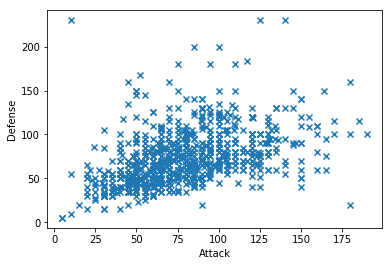

In [79]:
plt.scatter(pokedex['Attack'], pokedex['Defense'],marker='x' )
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.plot()
# plt.show()


In [80]:
victories = pd.read_csv("combats.csv")
# print(victories)
victories.sort_values(['Winner'])
victcount = Counter()
for i, r in victories.iterrows():
	victcount[r['Winner']] +=1
for i in victcount.most_common(10):
	print(i[1],'wins\n', pokedex.iloc[i[0]-1, 1])
print('Most wins:' , victcount.most_common(10))

grasspokes = pokedex.loc[(pokedex['Class 1'] == 'Grass') | (pokedex['Class 2'] == 'Grass')]
rockpokes = pokedex.loc[(pokedex['Class 1'] == 'Rock') |( pokedex['Class 2'] == 'Rock')]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
	print('grass pokemon stats \n' ,grasspokes.describe())
	print('rock pokemon stats \n', rockpokes.describe())
    
#Rock 93 vs grass 72.

152 wins
 Mewtwo
136 wins
 Aerodactyl
136 wins
 Infernape
134 wins
 Jirachi
133 wins
 Slaking
133 wins
 Deoxys Speed Forme
130 wins
 Murkrow
130 wins
 Mega Absol
128 wins
 Mega Houndoom
127 wins
 Mega Aerodactyl
Most wins: [(163, 152), (154, 136), (438, 136), (428, 134), (314, 133), (432, 133), (214, 130), (394, 130), (249, 128), (155, 127)]
grass pokemon stats 
               pid          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count   95.000000   95.000000   95.000000   95.000000   95.000000   95.000000   
mean   427.894737   66.052632   73.463158   73.252632   72.936842   71.505263   
std    239.846426   18.861967   24.168210   24.891239   26.270609   20.694266   
min      1.000000   30.000000   27.000000   30.000000   24.000000   30.000000   
25%    240.000000   50.000000   57.000000   55.000000   54.500000   55.000000   
50%    453.000000   65.000000   70.000000   70.000000   65.000000   70.000000   
75%    609.500000   75.000000   94.500000   85.000000   90.000000  

In [81]:
# print(list(pokedex))
pokedex['Total stats'] = pokedex.iloc[:, 4:10].sum(axis=1)
# print(pokedex)
# print(('Mega' in pokedex['Name']))
thing = pokedex.loc[(pokedex['Name'] == '')]
# print(thing)
for i, r in pokedex.iterrows():
# 	print(str(r['Name']))
	if "Mega" in str(r['Name']):
		pokedex.loc[i, 'Mega'] = 'True'
	else:
		pokedex.loc[i, 'Mega'] = 'False'
#  = sum(pokedex.iloc[:, 5:8])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
	# pass
	print((pokedex))


     pid                       Name   Class 1   Class 2   HP  Attack  Defense  \
0      1                  Bulbasaur     Grass    Poison   45      49       49   
1      2                    Ivysaur     Grass    Poison   60      62       63   
2      3                   Venusaur     Grass    Poison   80      82       83   
3      4              Mega Venusaur     Grass    Poison   80     100      123   
4      5                 Charmander      Fire       NaN   39      52       43   
5      6                 Charmeleon      Fire       NaN   58      64       58   
6      7                  Charizard      Fire    Flying   78      84       78   
7      8           Mega Charizard X      Fire    Dragon   78     130      111   
8      9           Mega Charizard Y      Fire    Flying   78     104       78   
9     10                   Squirtle     Water       NaN   44      48       65   
10    11                  Wartortle     Water       NaN   59      63       80   
11    12                  Bl

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
combats = pd.read_csv("combats.csv")

In [84]:
print(combats)
train, test = train_test_split(combats)

       First_pokemon  Second_pokemon  Winner
0                266             298     298
1                702             701     701
2                191             668     668
3                237             683     683
4                151             231     151
5                657             752     657
6                192             134     134
7                 73             545     545
8                220             763     763
9                302              31      31
10               442             130     130
11               701             624     701
12                15             283     283
13               151              87     151
14               269             462     269
15               763             448     448
16               143             263     263
17               365             240     240
18               499             774     499
19               563             578     563
20               440             687     687
21        

In [85]:
# print(train)
train_x = train.iloc[:, :2]
train_y = train.iloc[:,  2]
test_x = test.iloc[:, :2]
test_y = test.iloc[:,  2]
print(train_x)

       First_pokemon  Second_pokemon
31144            765             793
45405            721             282
25058            387             482
614               11             771
43122            654             432
8437             613             389
41692            348             303
33229            417             688
18531            635             789
36176            200             356
7918             257              84
33705            403              41
42007            477             359
37118            276              53
41369            770             336
36193            262             361
41247            260             658
45560            691              61
28770            374              48
43541            327             777
5621             538             359
26030            299             408
19488            654             718
19747             26             214
44603            214             115
14401            552             785
3

In [148]:
from sklearn.naive_bayes import MultinomialNB

PokePred = MultinomialNB()
# PokePred.fit(train_x, train_y)
# print(pokedex.iloc[train_x.iloc[0,0]])
# print(pokedex.iloc[train_x.iloc[0,1]])

    
# print(PokePred.score(test_x, test_y))

from sklearn.metrics import confusion_matrix

def getChunk(ids):
    X_chunk = pd.DataFrame()
    for i in ids:
    #     print(i)
        X_block = pokedex[pokedex['pid'] == i]
    #     print(X_block)
        X_chunk = X_chunk.append(X_block)
    return X_chunk

chunkrows = train_x.iloc[1:10 , 0]
X_chunk_a = getChunk(chunkrows)
chunkrows = train_x.iloc[chunkstartmarker:chunkstartmarker+10 , 1]
X_chunk_b = getChunk(chunkrows)
X_chunk = X_chunk_a.append(X_chunk_b)



NameError: name 'chunkstartmarker' is not defined

In [117]:
def batchers():
    chunkstartmarker = 0
    while chunkstartmarker < train_x.shape[0]:
        chunkrows = train_x.iloc[chunkstartmarker:chunkstartmarker+10 , 0]
        X_chunk_a = getChunk(chunkrows)
        chunkrows = train_x.iloc[chunkstartmarker:chunkstartmarker+10 , 1]
        X_chunk_b = getChunk(chunkrows)
        X_chunk = X_chunk_a.append(X_chunk_b)
        y_chunk = train_y.iloc[chunkrows]
#         print(X_chunk, y_chunk)
        yield X_chunk, y_chunk
        chunkstartmarker += 10
    
def getChunk(ids):
    X_chunk = pd.DataFrame()
    for i in ids:
    #     print(i)
    X_block = pokedex[pokedex['pid'] == i]
    #     print(X_block)
    X_chunk = X_chunk.append(X_block)
    return X_chunk
    

In [118]:
batcher = batchers()
# print(batcher)
for X_chunk, y_chunk in (batcher):
#     print(X_chunk, y_chunk)
    PokePred.partial_fit(X_chunk, y_chunk, classes=np.unique(y_chunk))

       First_pokemon  Second_pokemon
31144            765             793
45405            721             282
25058            387             482
614               11             771
43122            654             432
8437             613             389
41692            348             303
33229            417             688
18531            635             789
36176            200             356


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [89]:
PokePred.score(test_x,test_y)

0.00168